In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from code import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
DATA_PATH="./data/"
def get_labels(path=DATA_PATH):
	labels=os.listdir(path)
	label_indices=np.arange(0,len(labels))
	return labels, label_indices, to_categorical(label_indices)

In [ ]:
def speech2mfcc(file_path,max_len=11):
	wave, sr= librosa.load(file_path, mono=True, sr=None)
	wave=wave[::5]
	mfcc=librosa.feature.mfcc(wave,sr=sr)
#	print(mfcc)
	if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
		pad_width=max_len-mfcc.shape[1]
		mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')

	else:
		mfcc=mfcc[:,:max_len]
#	print(mfcc.shape)
	return mfcc

In [ ]:
def save_data_to_array(path=DATA_PATH, max_len=11):
	labels,_,_=get_labels(path)

	for label in labels:
		mfcc_vectors=[]

		speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
		for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
			mfcc=speech2mfcc(speech,max_len=max_len)
			print(mfcc.shape)
			mfcc_vectors.append(mfcc)
#		print(mfcc_vectors)
		np.save(label+'.npy',mfcc_vectors)

In [ ]:
def get_train_test(split_ratio=0.8,random_state=42):
	labels,indices,_=get_labels(DATA_PATH)

	X=np.load(labels[0]+'.npy')
	y=np.zeros(X.shape[0])
	
	for i,label in enumerate(labels[1:]):
		x=np.load(label+'.npy')
		X=np.vstack((X,x))
		y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
	assert X.shape[0] == len(y)
#	print(X.shape)
#	print(y)
	return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [57]:
save_data_to_array()

Saving vectors to label -'1':  85%|████████▍ | 22/26 [00:00<00:00, 97.05it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':   8%|▊         | 2/26 [00:00<00:01, 17.46it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  35%|███▍      | 9/26 [00:00<00:00, 22.63it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  69%|██████▉   | 18/26 [00:00<00:00, 28.94it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10': 100%|██████████| 26/26 [00:00<00:00, 31.14it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)



Saving vectors to label -'2':  31%|███       | 8/26 [00:00<00:00, 31.68it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  46%|████▌     | 12/26 [00:00<00:00, 32.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  85%|████████▍ | 22/26 [00:00<00:00, 36.72it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  12%|█▏        | 3/26 [00:00<00:00, 28.26it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  38%|███▊      | 10/26 [00:00<00:00, 31.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  69%|██████▉   | 18/26 [00:00<00:00, 33.59it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  81%|████████  | 21/26 [00:00<00:00, 24.87it/s]

(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  23%|██▎       | 6/26 [00:00<00:00, 25.98it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  65%|██████▌   | 17/26 [00:00<00:00, 32.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  81%|████████  | 21/26 [00:00<00:00, 33.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  12%|█▏        | 3/26 [00:00<00:01, 22.76it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  38%|███▊      | 10/26 [00:00<00:00, 26.62it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  73%|███████▎  | 19/26 [00:00<00:00, 31.88it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  35%|███▍      | 9/26 [00:00<00:00, 31.56it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  58%|█████▊    | 15/26 [00:00<00:00, 33.91it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  92%|█████████▏| 24/26 [00:00<00:00, 33.67it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  12%|█▏        | 3/26 [00:00<00:00, 24.73it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  23%|██▎       | 6/26 [00:00<00:00, 24.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  62%|██████▏   | 16/26 [00:00<00:00, 30.85it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  23%|██▎       | 6/26 [00:00<00:00, 21.33it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  58%|█████▊    | 15/26 [00:00<00:00, 27.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  92%|█████████▏| 24/26 [00:00<00:00, 32.39it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  12%|█▏        | 3/26 [00:00<00:00, 29.27it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  54%|█████▍    | 14/26 [00:00<00:00, 35.75it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9': 100%|██████████| 26/26 [00:00<00:00, 42.93it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


In [104]:
X_train, X_test, y_train, y_test=get_train_test()
X_train=X_train.reshape(X_train.shape[0],20,11,1)
X_test=X_test.reshape(X_test.shape[0],20,11,1)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [ ]:
#weights_4=[]
#weights_6=[]
for i in range(80,91):
    model=Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(20,11,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    
    model.fit(X_train,y_train_hot,batch_size=100,epochs=i,verbose=1,validation_data=(X_test,y_test_hot))
    
    w_4=model.layers[4].get_weights()[0]
    w_4=w_4[1,:]  #Take the 1st row only
    
    w_6=model.layers[6].get_weights()[0]
    w_6=np.transpose(w_6)[1,:] #transpose and the take the 1st row only
    
    if i==60:
        weights_4=w_4
        weights_6=w_6
        
    else:    
        weights_4=np.vstack((weights_4,w_4))
        weights_6=np.vstack((weights_6,w_6))

Train on 208 samples, validate on 52 samples
Epoch 1/80
208/208 [==============================] - 11s 52ms/step - loss: 13.3995 - acc: 0.1106 - val_loss: 11.6613 - val_acc: 0.1731
Epoch 2/80
208/208 [==============================] - 0s 2ms/step - loss: 11.7323 - acc: 0.1827 - val_loss: 13.3918 - val_acc: 0.0962
Epoch 3/80
208/208 [==============================] - 0s 703us/step - loss: 12.4065 - acc: 0.1731 - val_loss: 13.1084 - val_acc: 0.1538
Epoch 4/80
208/208 [==============================] - 0s 454us/step - loss: 11.7911 - acc: 0.2067 - val_loss: 12.5473 - val_acc: 0.1538
Epoch 5/80
208/208 [==============================] - 0s 442us/step - loss: 11.1626 - acc: 0.2163 - val_loss: 13.0181 - val_acc: 0.1731
Epoch 6/80
208/208 [==============================] - 0s 383us/step - loss: 12.5839 - acc: 0.1538 - val_loss: 11.7288 - val_acc: 0.1731
Epoch 7/80
208/208 [==============================] - 0s 368us/step - loss: 10.3778 - acc: 0.2692 - val_loss: 10.9551 - val_acc: 0.2692
Epoch

208/208 [==============================] - 0s 392us/step - loss: 1.1075 - acc: 0.6298 - val_loss: 1.7074 - val_acc: 0.5385
Epoch 42/81
208/208 [==============================] - 0s 405us/step - loss: 0.9423 - acc: 0.6538 - val_loss: 1.4859 - val_acc: 0.5769
Epoch 43/81
208/208 [==============================] - 0s 364us/step - loss: 0.8850 - acc: 0.7260 - val_loss: 1.6043 - val_acc: 0.5192
Epoch 44/81
208/208 [==============================] - 0s 331us/step - loss: 0.9570 - acc: 0.6538 - val_loss: 1.6129 - val_acc: 0.4808
Epoch 45/81
208/208 [==============================] - 0s 367us/step - loss: 1.0494 - acc: 0.6635 - val_loss: 1.5718 - val_acc: 0.4615
Epoch 46/81
208/208 [==============================] - 0s 342us/step - loss: 0.8845 - acc: 0.6971 - val_loss: 1.6249 - val_acc: 0.4615
Epoch 47/81
208/208 [==============================] - 0s 350us/step - loss: 0.8916 - acc: 0.7163 - val_loss: 1.6958 - val_acc: 0.4808
Epoch 48/81
208/208 [==============================] - 0s 368us/ste

208/208 [==============================] - 0s 360us/step - loss: 0.6963 - acc: 0.7548 - val_loss: 1.5832 - val_acc: 0.6538
Epoch 81/82
208/208 [==============================] - 0s 330us/step - loss: 0.8053 - acc: 0.7692 - val_loss: 1.5971 - val_acc: 0.5962
Epoch 82/82
208/208 [==============================] - 0s 326us/step - loss: 0.8145 - acc: 0.7115 - val_loss: 1.6491 - val_acc: 0.6154
Train on 208 samples, validate on 52 samples
Epoch 1/83
208/208 [==============================] - 5s 24ms/step - loss: 13.3290 - acc: 0.0962 - val_loss: 14.5816 - val_acc: 0.0769
Epoch 2/83
208/208 [==============================] - 0s 384us/step - loss: 13.0156 - acc: 0.1394 - val_loss: 13.1109 - val_acc: 0.1346
Epoch 3/83
208/208 [==============================] - 0s 333us/step - loss: 13.0950 - acc: 0.1538 - val_loss: 14.4295 - val_acc: 0.0577
Epoch 4/83
208/208 [==============================] - 0s 327us/step - loss: 12.1946 - acc: 0.1971 - val_loss: 14.8782 - val_acc: 0.0769
Epoch 5/83
208/208 

208/208 [==============================] - 0s 362us/step - loss: 6.1505 - acc: 0.4952 - val_loss: 6.9984 - val_acc: 0.3654
Epoch 36/84
208/208 [==============================] - 0s 341us/step - loss: 5.7547 - acc: 0.5288 - val_loss: 7.8291 - val_acc: 0.3654
Epoch 37/84
208/208 [==============================] - 0s 334us/step - loss: 6.5464 - acc: 0.5096 - val_loss: 11.4732 - val_acc: 0.1538
Epoch 38/84
208/208 [==============================] - 0s 346us/step - loss: 8.4043 - acc: 0.3654 - val_loss: 7.4354 - val_acc: 0.4038
Epoch 39/84
208/208 [==============================] - 0s 338us/step - loss: 6.7973 - acc: 0.4760 - val_loss: 7.3775 - val_acc: 0.3846
Epoch 40/84
208/208 [==============================] - 0s 331us/step - loss: 5.7592 - acc: 0.5337 - val_loss: 6.9631 - val_acc: 0.4038
Epoch 41/84
208/208 [==============================] - 0s 264us/step - loss: 5.8645 - acc: 0.5288 - val_loss: 5.1018 - val_acc: 0.4615
Epoch 42/84
208/208 [==============================] - 0s 282us/st

In [98]:
sd_w4=weights_4.std(0)
sd_w6=weights_6.std(0)

In [92]:
np.save('SD_weights_4_1440.npy',sd_w4)
np.save('SD_weights_6_128.npy',sd_w6)

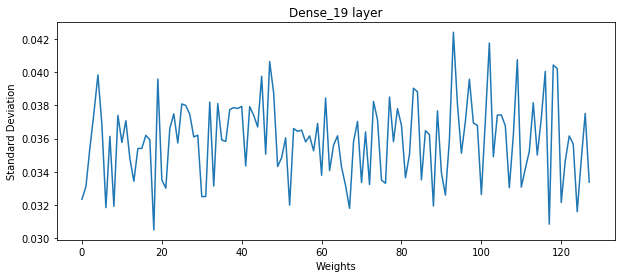

In [100]:
weight_number=np.arange(0,128)
plt.figure(figsize=(10,4))
plt.plot(weight_number,sd_w4)
plt.xlabel('Weights')
plt.ylabel('Standard Deviation')
#plt.xticks(weight_number,(np.arange(1,1441)))
plt.title('Dense_19 layer')
plt.savefig('SD_weights_4.svg',format='svg', dpi=1200)

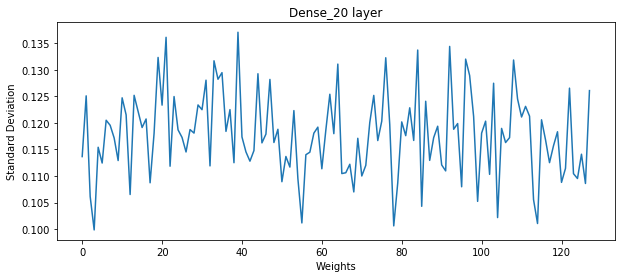

In [101]:
weight_number=np.arange(0,128)
plt.figure(figsize=(10,4))
plt.plot(weight_number,sd_w6)
plt.xlabel('Weights')
plt.ylabel('Standard Deviation')
#plt.xticks(weight_number,(np.arange(1,1441)))
plt.title('Dense_20 layer')
v 